<H2>Parameter estimation by maximum likelihood method<H2>

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from scipy.stats import norm
from lmfit import minimize, Parameters

## <H2> Create a normally distributed random variable</H2>

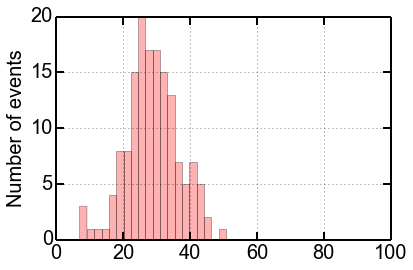

In [11]:
# create some data
mymean = 28.74
mysigma = 8.33 # standard deviation!
rv_norm = norm(loc = mymean, scale = mysigma)
data = rv_norm.rvs(size = 150)
plt.hist(data, bins=20, facecolor='red', alpha=.3);

plt.ylabel('Number of events');
plt.xlim(0,100);

## <H2> Define a model function</H2>

In [12]:
def mynorm(x, params):
    mu, sigma = params
    # scipy implementation
    mynorm = norm(loc = mu, scale = sigma)
    return mynorm.pdf(x)

mynorm(0, [0,1]) # 0.39

0.3989422804014327

<H2> Loglikelihood function to be minimize </H2>

In [13]:
def loglikelihood(params, data):
    mu = params['mean'].value
    sigma = params['std'].value
    
    l1 = np.log( mynorm(data, [mu, sigma]) ).sum()
    return(-l1) # return negative loglikelihood to minimize

myfoo = Parameters()
myfoo.add('mean', value = 20)
myfoo.add('std', value = 5.0)
loglikelihood(myfoo, data)

794.4880315495127

In [14]:
myparams = Parameters()
myparams.add('mean', value = 20.3)
myparams.add('std', value = 5.0)

In [15]:
out = minimize(fcn = loglikelihood, params=myparams, method='nelder', args=(data,))
print(out.userfcn(myparams, data)) # ~523.631337424

AttributeError: 'MinimizerResult' object has no attribute 'userfcn'

In [16]:
from lmfit import report_errors
report_errors(myparams)

[[Variables]]
    mean:   20.3000000 (init= 20.3)
    std:    5          (init= 5)
[[Correlations]] (unreported correlations are <  0.100)


The estimated mean and standard deviation should be identical to the mean
and the standard deviation of the sample population

In [17]:
np.mean(data), np.std(data)

(28.812147384304652, 7.7946507327263665)

## <H2> Plot histogram and model together </H2>

In [18]:
# Compute binwidth
counts, binedge = np.histogram(data, bins=20);

bincenter = [0.5 * (binedge[i] + binedge[i+1]) for i in xrange(len(binedge)-1)]
binwidth = (max(bincenter) - min(bincenter)) / len(bincenter) 

In [19]:
# Adjust PDF function to data
ivar = np.linspace(0, 100, 100)
params =  [ myparams['mean'].value, myparams['std'].value ]
mynormpdf = mynorm(ivar, params)*binwidth*len(data)

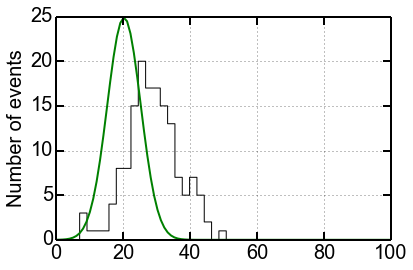

In [20]:
# Plot everything together
plt.hist(data, bins=20, facecolor='white', histtype='stepfilled');

plt.plot(ivar, mynormpdf);
plt.ylabel('Number of events');